(30, 20, 32, 32)
[20 28 25  9  9 24 21 12 14  1  4  5  0 28  8]


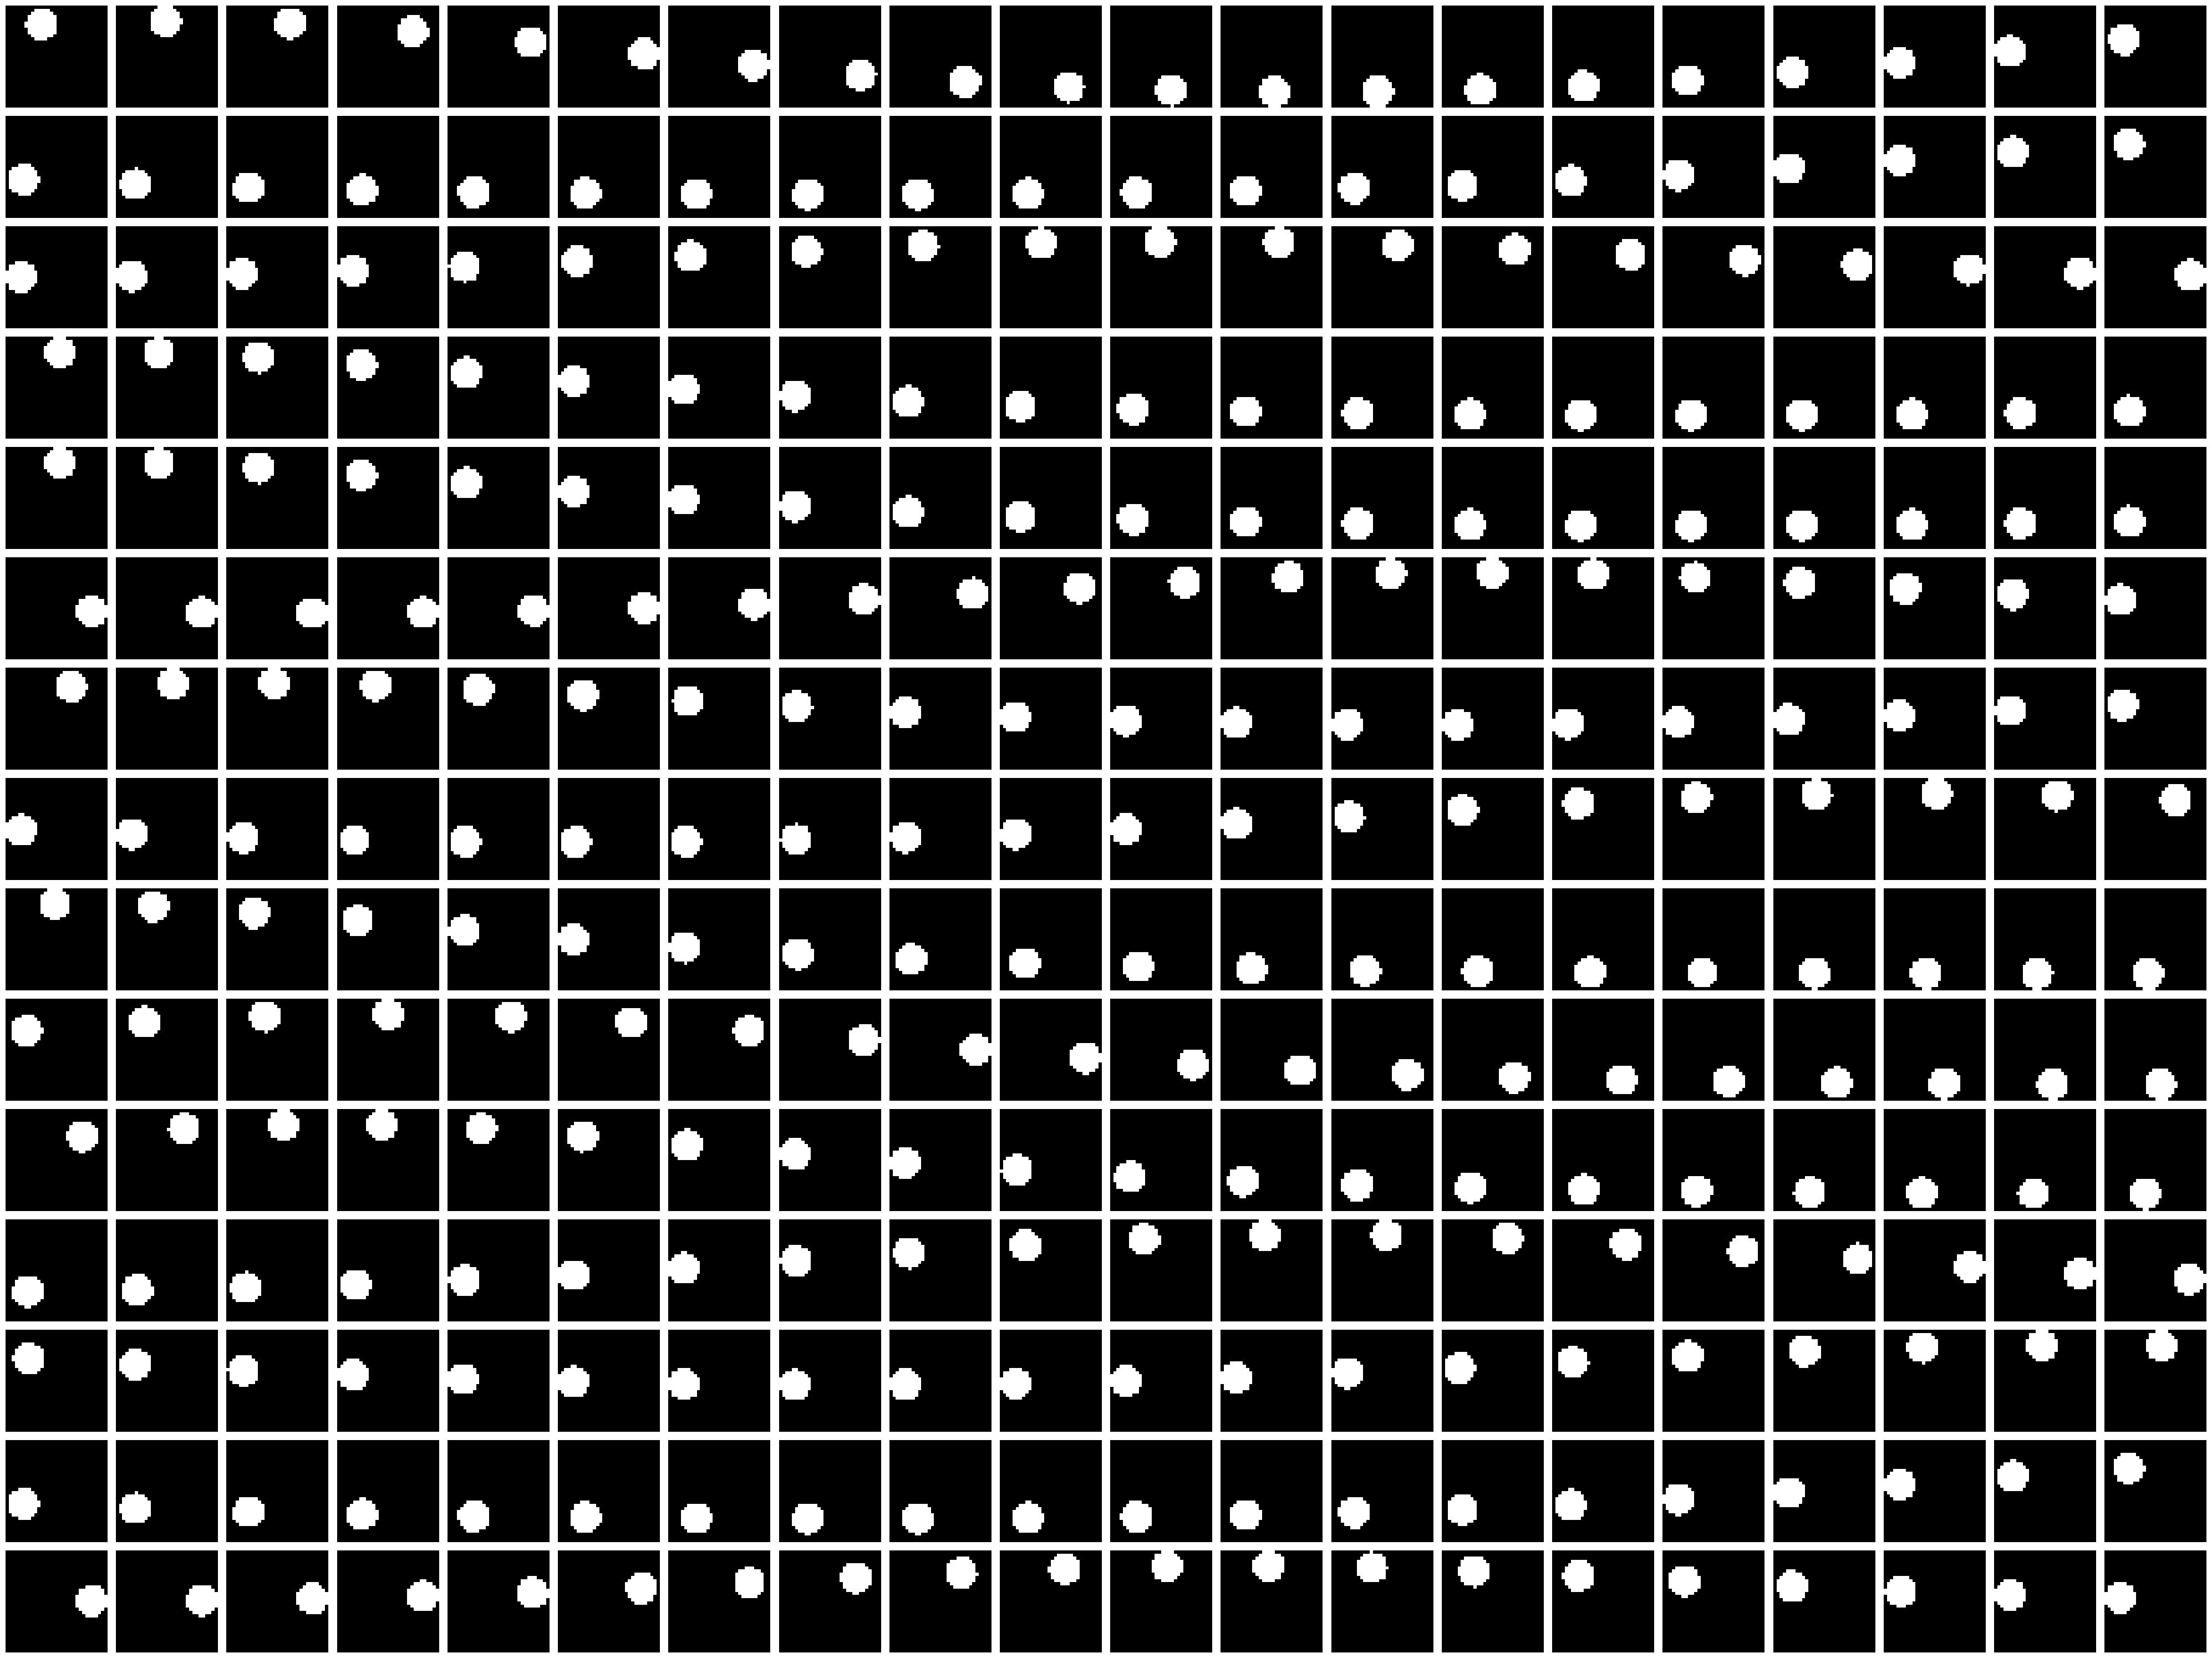

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_plot_sequences(npz_file, num_sequences=5, timesteps=20, img_shape=(32, 32)):
    """
    Load time-sequences from an NPZ file and plot a few sequence samples.

    Args:
        npz_file (str): Path to the .npz file.
        num_sequences (int): Number of sequences to plot.
        timesteps (int): Number of timesteps per sequence.
        img_shape (tuple): Shape of each image (height, width).

    The plot displays `num_sequences` sequences in a column.
    """
    # Load the .npz file
    data = np.load(npz_file)['image'].astype(np.float32)
    print(data.shape)
    
    # Select a few sequences to plot
    indices = np.random.randint(0, data.shape[0], num_sequences)
    print(indices)
    selected_sequences = data[indices]  # Select the first few sequences
    
    # Convert to grayscale if not already
    if selected_sequences.shape[2] > 1:
        selected_sequences = 0.2989 * selected_sequences[:, :, 0, :, :] + 0.5870 * selected_sequences[:, :, 1, :, :] +  0.1140 * selected_sequences[:, :, 2, :, :]
    else:
        # Regardless, cut out that axis
        selected_sequences = selected_sequences[:, :, 0]

    # Create a plot with one column and `num_samples` rows
    fig, axes = plt.subplots(num_sequences, timesteps, figsize=(timesteps * 2, num_sequences * 2))

    for seq_idx in range(num_sequences):
        for step in range(timesteps):
            ax = axes[seq_idx, step]
            ax.imshow(selected_sequences[seq_idx, step], cmap='gray')
            ax.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()
    plt.close()


# Example usage
npz_file = "mass_spring/train.npz"
load_and_plot_sequences(npz_file, num_sequences=15, timesteps=20, img_shape=(32, 32))
